# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [7]:
n = 6
label_name = "stat8"
epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [8]:

layers = [16,5,2]
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [9]:
import os

directory = "models"
if not os.path.exists(directory):
    os.makedirs(directory)


for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")


Epoch 0, Loss 6.314155399799347
Epoch 1, Loss 6.304253995418549
Epoch 2, Loss 6.293155610561371
Epoch 3, Loss 6.304084002971649
Epoch 4, Loss 6.2792670130729675
Epoch 5, Loss 6.289564609527588
Epoch 6, Loss 6.2598729729652405
Epoch 7, Loss 6.256426393985748
Epoch 8, Loss 6.253292083740234
Epoch 9, Loss 6.251421630382538
Epoch 10, Loss 6.247998476028442
Epoch 11, Loss 6.24547666311264
Epoch 12, Loss 6.244657635688782
Epoch 13, Loss 6.238759815692902
Epoch 14, Loss 6.238775372505188
Epoch 15, Loss 6.231721460819244
Epoch 16, Loss 6.23540472984314
Epoch 17, Loss 6.230185270309448
Epoch 18, Loss 6.228294909000397
Epoch 19, Loss 6.224136471748352
Epoch 20, Loss 6.227595150470734
Epoch 21, Loss 6.221544563770294
Epoch 22, Loss 6.2208603620529175
Epoch 23, Loss 6.222058415412903
Epoch 24, Loss 6.222298085689545
Epoch 25, Loss 6.209946036338806
Epoch 26, Loss 6.214974522590637
Epoch 27, Loss 6.217423260211945
Epoch 28, Loss 6.209027171134949
Epoch 29, Loss 6.212721467018127
Epoch 30, Loss 6.21

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

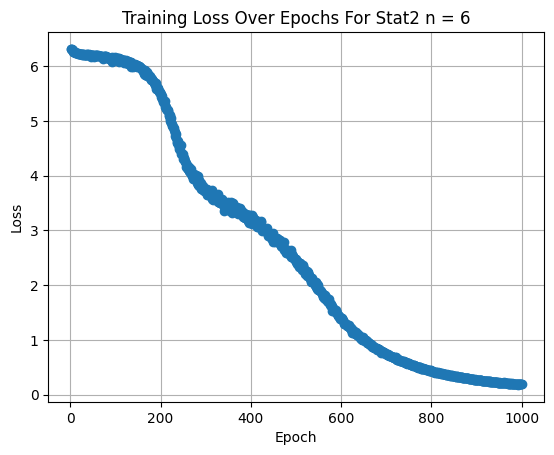

In [10]:
# Plot the training losses
plt.figure()
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Training Loss Over Epochs For Stat2 n = 6')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Ensure the "figures" directory exists
figures_directory = "figures"
if not os.path.exists(figures_directory):
    os.makedirs(figures_directory)

# Save the plot
plt.savefig(os.path.join(figures_directory, 'training_loss_curve_stat8_n = 6.png'))
plt.show()
plt.close()  # Explicitly close the plot to ensure it is written to the file





# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

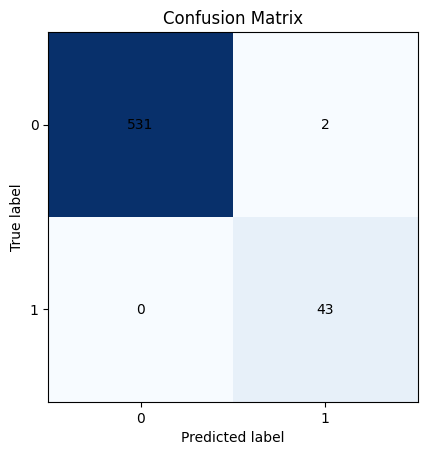

Accuracy for class 0 = 99.62476547842401%
Accuracy for class 1 = 100.0%
Overall accuracy = 99.65277777777777%


In [11]:
# TOD0
confusion_matrix = evaluate_model(model, training_dataset)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

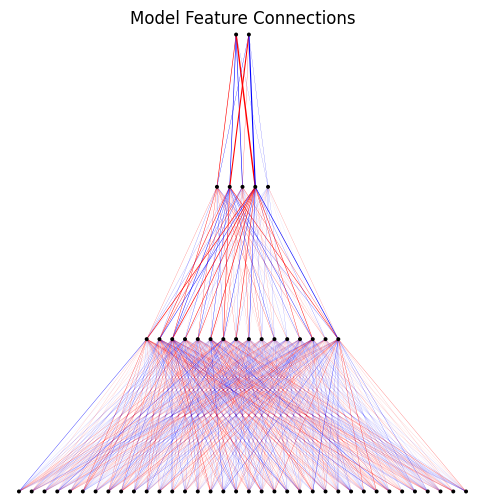

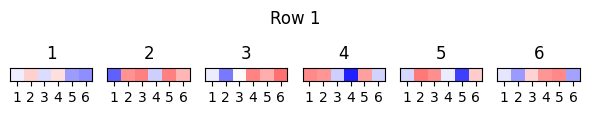

In [12]:



model.plot_connections()

#model.plot_heatmap_feature(0, 0)
model.plot_heatmap_feature(0, 1)



